# IIMK Professional Certificate in Data Science and AI for Managers

## Assignment 9.1: Supervised Learning and Classification Models

**Student Information:**
- **Name:** Lalit Nayyar
- **Email:** lalitnayyar@gmail.com
- **Course:** Professional Certificate in Data Science and Artificial Intelligence for Managers
- **Institution:** Indian Institute of Management Kozhikode (IIMK)

## Assignment Overview

This project implements supervised learning techniques to predict income levels using the Adult Income Dataset. The assignment focuses on understanding classification models, their performance metrics, and data preprocessing techniques.

### Learning Objectives
1. Detail the Supervised Learning process
2. Evaluate classifiers based on specific performance metrics
3. Differentiate between SVM Classifiers and Naïve Bayes Classifiers
   
# Adult Income Classification Project

## Learning Outcomes
1. Understanding Supervised Learning Process
2. Evaluating Classifiers using Performance Metrics
3. Comparing SVM and Naïve Bayes Classifiers

## Business Use Cases
Predicting income levels has several important business applications:
1. **Financial Services**: Banks can use this for credit risk assessment and loan approval processes
2. **Marketing**: Companies can target products and services based on predicted income levels
3. **Policy Making**: Government agencies can use it for economic policy planning and social program targeting
4. **HR & Recruitment**: Companies can use it for salary benchmarking and compensation planning
5. **Insurance**: Risk assessment and premium calculation based on demographic factors

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

## 1. Supervised Learning Process

Supervised learning follows these key steps:

1. **Data Collection**: Gathering labeled data where we know the target variable
2. **Data Preprocessing**: 
   - Handling missing values
   - Feature encoding
   - Feature scaling
3. **Data Splitting**: Dividing data into training and testing sets
4. **Model Training**: Using training data to teach the model patterns
5. **Model Evaluation**: Testing model performance on unseen data
6. **Model Deployment**: Using the model for real-world predictions

In [5]:
# Load the dataset
# Note: You need to download the dataset from Kaggle first
df = pd.read_csv('data/adult.csv')

# Display first few rows and basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())
print("\nDataset Info:")
display(df.info())

Dataset Shape: (48842, 15)

First few rows:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

## 2. Data Preprocessing

### 2.1 Exploratory Data Analysis (EDA)

Missing Values:


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Numerical Columns Statistics:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


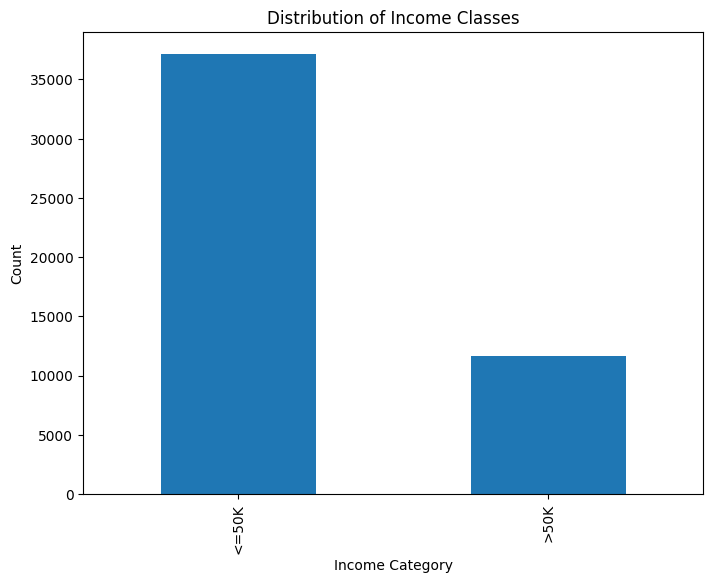

In [6]:
# Check for missing values
print("Missing Values:")
display(df.isnull().sum())

# Basic statistics for numerical columns
print("\nNumerical Columns Statistics:")
display(df.describe())

# Distribution of target variable
plt.figure(figsize=(8, 6))
df['income'].value_counts().plot(kind='bar')
plt.title('Distribution of Income Classes')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

### 2.2 Data Encoding and Feature Engineering

In [9]:
# Function to preprocess the data
def preprocess_data(df):
    # Create a copy of the dataframe
    df_processed = df.copy()
    
    # Handle missing values
    df_processed = df_processed.replace('?', np.nan)
    
    # Fill missing values
    for column in df_processed.columns:
        if df_processed[column].dtype == 'object':
            df_processed[column].fillna(df_processed[column].mode()[0], inplace=True)
        else:
            df_processed[column].fillna(df_processed[column].median(), inplace=True)
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in df_processed.select_dtypes(include=['object']).columns:
        df_processed[column] = le.fit_transform(df_processed[column])
    
    return df_processed

# Preprocess the data
df_processed = preprocess_data(df)

# Split features and target
X = df_processed.drop('income', axis=1)
y = df_processed['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Model Training and Evaluation

### 3.1 Support Vector Machine (SVM) Classifier

SVM Characteristics:
- Finds optimal hyperplane to separate classes
- Works well with high-dimensional data
- Effective when there's a clear margin of separation
- Can handle non-linear classification using kernels

SVM Classifier Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      7414
           1       0.76      0.54      0.63      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



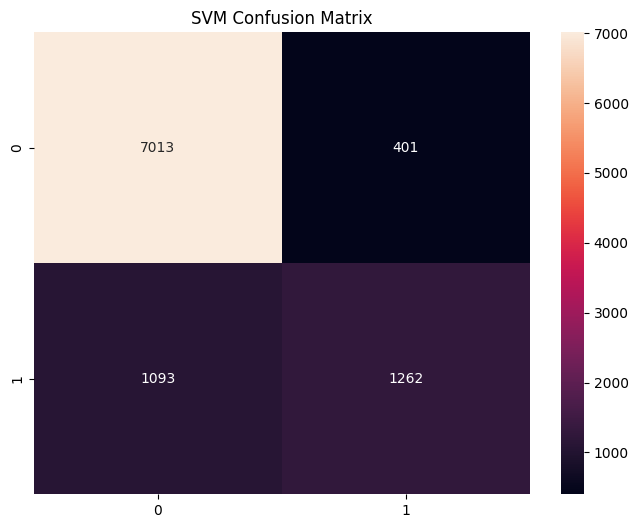

In [8]:
# Train SVM Classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test_scaled)

# Evaluate SVM performance
print("SVM Classifier Performance:")
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

### 3.2 Naïve Bayes Classifier

Naïve Bayes Characteristics:
- Based on Bayes' theorem with independence assumption
- Fast training and prediction
- Works well with high-dimensional data
- Effective for text classification and spam filtering

Naive Bayes Classifier Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7414
           1       0.70      0.34      0.46      2355

    accuracy                           0.81      9769
   macro avg       0.76      0.65      0.67      9769
weighted avg       0.79      0.81      0.78      9769



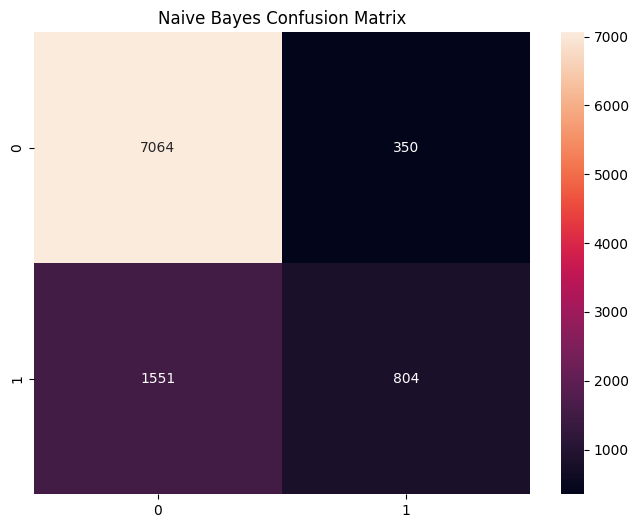

In [10]:
# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Make predictions
nb_predictions = nb_classifier.predict(X_test_scaled)

# Evaluate Naive Bayes performance
print("Naive Bayes Classifier Performance:")
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='d')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## 4. Comparison of SVM and Naïve Bayes

### Key Differences:

1. **Assumptions**:
   - SVM: Makes no strong assumptions about data distribution
   - Naïve Bayes: Assumes feature independence

2. **Computational Efficiency**:
   - SVM: More computationally intensive, especially with large datasets
   - Naïve Bayes: Very fast training and prediction

3. **Performance**:
   - SVM: Generally better with clear margin of separation
   - Naïve Bayes: Better with independent features

4. **Use Cases**:
   - SVM: Complex decision boundaries, high-dimensional data
   - Naïve Bayes: Text classification, spam filtering, recommendation systems

SVM Accuracy: 0.8471
Naive Bayes Accuracy: 0.8054


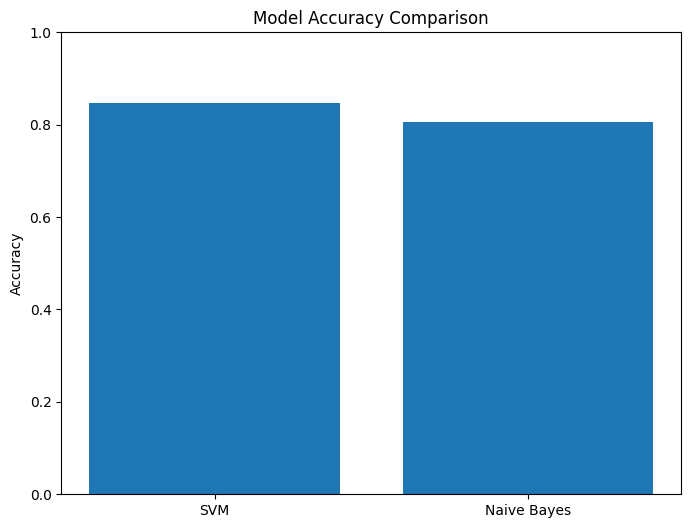

In [11]:
# Compare model performances
models = {
    'SVM': svm_predictions,
    'Naive Bayes': nb_predictions
}

for name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Plot comparison of accuracies
accuracies = [accuracy_score(y_test, pred) for pred in models.values()]
plt.figure(figsize=(8, 6))
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()